In [1]:
import best

In [2]:
import matplotlib.pyplot as plt

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]

In [4]:
import numpy as np

In [5]:
import yaml

In [6]:
import pathlib

In [7]:
import itertools

In [8]:
import mystic as my

In [9]:
import utilities as u

In [10]:
values_file = 'configurations/config_plotting_profile.yaml' 
with open(values_file, 'r') as stream:
            data = yaml.safe_load(stream)

In [11]:
estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())
estimators

['hu_ok', 'shear', 'bh', 'pbh']

In [12]:
lmin_sel, lmax_sel = data['lmin_sel'], data['lmax_sel']

optversion = data['optversion']

In [13]:
analysis_directory = data['analysisdirectory']
PP = pathlib.Path(analysis_directory)

In [14]:
get_dir = lambda s, b, p: f'h3500s{s}b{b}p{p}'

In [15]:
lista_lmaxes = []
for e in estimators:
    elemento = estimators_dictionary[e]
    lmax_min, lmax_max = elemento['lmax_min'], elemento['lmax_max']
    num = elemento['number']
    lista_lmaxes += [np.linspace(lmax_min, lmax_max, num, dtype = int)]

lmaxes_configs = list(itertools.product(*lista_lmaxes))

In [16]:
estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())

In [17]:
bias_source = 'total'

In [18]:
PP = pathlib.Path('output0203/')

In [19]:
noisetag = data['noisekey']
trispectrumtag = data['trispectrumkey']
primarytag = data['primarykey']
secondarytag = data['secondarykey']
primarycrosstag = data['primarycrosskey']

kkkey = data['kkkey']
kgkey = data['kgkey']
ggkey = data['ggkey']
ellskey = data['ellskey']
thetakey = data['thetakey']
thetacrosskey = data['thetacrosskey']

In [20]:
nu = estimators_dictionary[estimators[0]]['nu']

In [21]:
totalbiaskey = data['totalbiaskey']

In [31]:
gtol = 1000
noisebiasconstr = 0
invvariance = 0
fbs = np.array([1., 9., 16.]) #[0., 1., 4., 9., 16.])

In [32]:
ns = np.array([])
bs = np.array([])
fs = np.array([])

allris = {}

In [33]:
estimators_sel = ['hu_ok', 'shear']

In [37]:
for fb in fbs:
    lmaxes = (3500, 3500, 3500)
    s, bh, p = lmaxes
    lmax_directory = get_dir(s, bh, p)
    print('Doing for', lmax_directory)

    P = PP/lmax_directory

    getoutname = lambda key: f'{key}_{nu}.npy'
    noises = np.load(P/getoutname(noisetag))

    getoutname2 = lambda key: f'{key}_total_{nu}.npy'

    if bias_source == 'total':
        biases = np.load(P/'total'/getoutname2(totalbiaskey)) #getoutname('sum_all_totalbias'))
        biasescross = np.load(P/'total'/getoutname2(primarycrosstag)) #/getoutname('sum_all_crosstotalbias'))
    elif bias_source == 'sum_bias':
        biases = np.load(P/getoutname(totalbiaskey))
        biasescross = np.load(P/getoutname(sum_all_crosstotalbias))
    elif bias_source == 'sum_abs_bias':
        biases = np.load(P/getoutname(sumalltotalabsbiaskey))
        biasescross = np.load(P/getoutname(sumallcrosstotalabsbiaskey))

    kg = np.load(P/getoutname(kgkey))
    kk = np.load(P/getoutname(kkkey))
    gg = np.load(P/getoutname(ggkey))
    ells = np.load(P/getoutname(ellskey))
    theta = np.load(P/getoutname(thetakey))
    thetacross = np.load(P/getoutname(thetacrosskey))
    
    noises = noises[:2, :2]
    biases = biases[:2, :2]
    
    theta = u.getcovarianceauto(noises, kk, fsky = 1.0)
    
    
    Optimizerkk = best.Opt(estimators_sel, lmin_sel, lmax_sel, ells, kk, theta, biases, noises, nocrosses = False)

    xprec, bprec = None, None
    result = Optimizerkk.optimize(optversion, x0 = xprec, bs0 = bprec, method = 'diff-ev', gtol = gtol, bounds = [0., 1.], 
                                      noisebiasconstr = noisebiasconstr, fb = fb, inv_variance = False, filter_biases = True)
        
    fnb_getter = lambda Opt, fb_val: Opt.get_f_n_b(Opt.ells_selected, Opt.theory_selected, Opt.theta_selected, Opt.biases_selected,
                              sum_biases_squared = False, bias_squared = False, fb = fb_val, inv_variance = False)
    
    allris[fb] = result.ws
    
    f, n, b = fnb_getter(Optimizerkk, fb)
    ns = np.append(ns, n(result.x))
    bs = np.append(bs, b(result.x))
    fs = np.append(fs, f(result.x))

Doing for h3500s3500b3500p3500
Start optimization with diff-ev
Doing for absbias
Generation 0 has ChiSquare: 0.004954
Generation 100 has ChiSquare: 0.001392
Generation 200 has ChiSquare: 0.000648
Generation 300 has ChiSquare: 0.000492
Generation 400 has ChiSquare: 0.000469
Generation 500 has ChiSquare: 0.000391
Generation 600 has ChiSquare: 0.000391
Generation 700 has ChiSquare: 0.000337
Generation 800 has ChiSquare: 0.000337
Generation 900 has ChiSquare: 0.000316
Generation 1000 has ChiSquare: 0.000316
Generation 1100 has ChiSquare: 0.000316
Generation 1200 has ChiSquare: 0.000316
Generation 1300 has ChiSquare: 0.000316
Generation 1400 has ChiSquare: 0.000298
Generation 1500 has ChiSquare: 0.000295
Generation 1600 has ChiSquare: 0.000293
Generation 1700 has ChiSquare: 0.000292
Generation 1800 has ChiSquare: 0.000292
Generation 1900 has ChiSquare: 0.000269
Generation 2000 has ChiSquare: 0.000260
Generation 2100 has ChiSquare: 0.000260
Generation 2200 has ChiSquare: 0.000260
Generation 

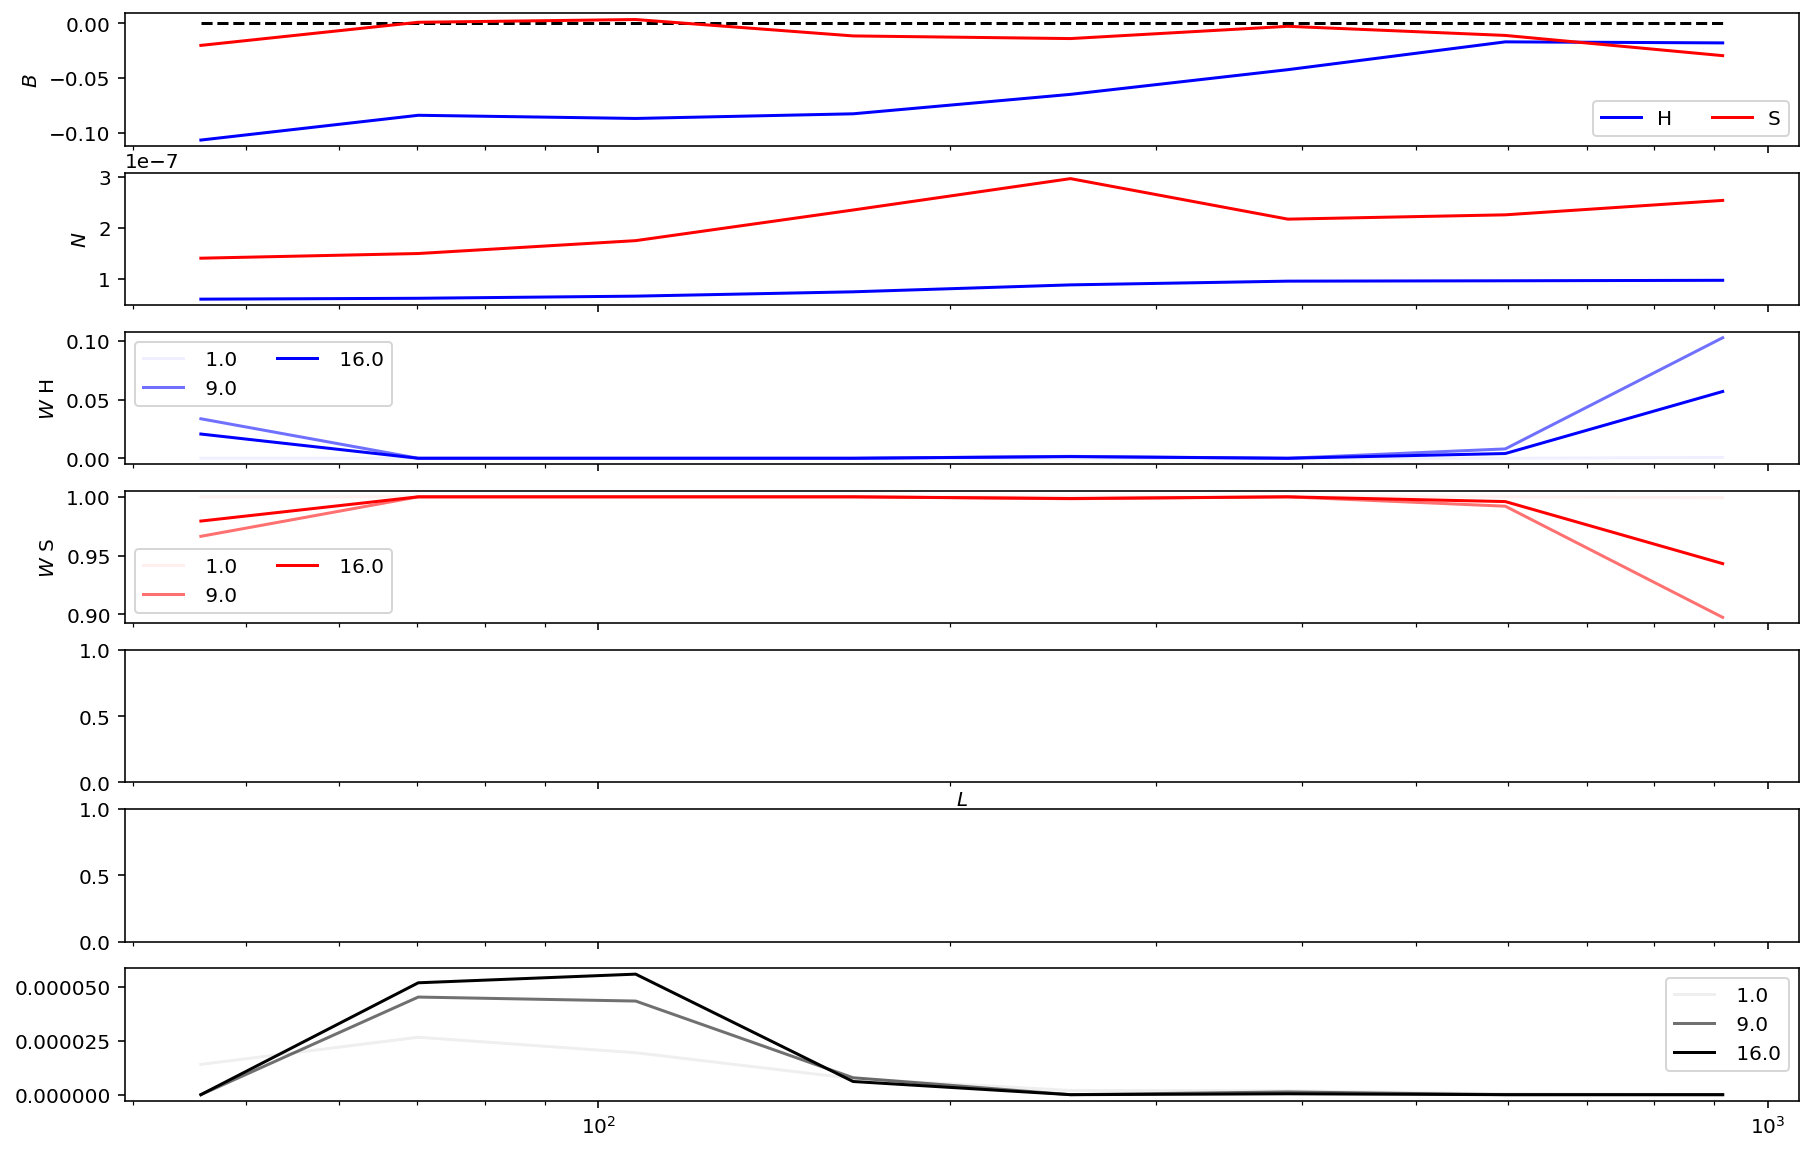

In [38]:
fbs_ = fbs

colors = ['blue', 'red', 'green', 'purple']
labels = ['H', 'S']#, 'B', 'P']

fig, ax = plt.subplots(nrows = 7, sharex = True, figsize = (15, 10))

kk = Optimizerkk.theory_selected

ells = Optimizerkk.ells_selected

#ax[0].plot(ells, combinedb/kk, color = 'purple', label = 'Combined', marker = 'o')
#ax[1].plot(ells, combinedn, color = 'purple', label = 'Combined', marker = 'o')

ax[0].plot(ells, ells*0., color = 'black', ls = '--')

for i in range(2):
    color = colors[i]
    label = labels[i]
    ax[0].plot(ells, Optimizerkk.biases_selected[i, i]/kk, color = color, label = label)
    
    ax[1].plot(ells, Optimizerkk.noises_selected[i, i], color = color, label = label)

    for fb in fbs_:
        if fb>0.:
            ws = allris[fb]
            ax[i+2].plot(ells, ws[i], color = color, label = f' {fb}', alpha =  1.*fb/fbs.max())
        
    ax[i+2].legend(ncol = len(fbs)-1)
    ax[i+2].set_ylabel(f'$W$ {label}')
    
for fb in fbs_:
    if fb > 0.:
        w = allris[fb][-1]
        ax[-1].plot(ells, w, color = 'black', label = f' {fb}', alpha = 1.*fb/fbs.max())

ax[-1].legend()

#ax[3].plot(ells, w, color = 'black')

#ax[4].plot(ells, ws*w*ells, color = 'red', label = 'S')
#ax[4].plot(ells, wbh*w*ells, color = 'green', label = 'B')

ax[4].set_xlabel('$L$')
ax[0].set_ylabel('$B$')
ax[1].set_ylabel('$N$')



#ax[3].set_ylabel('$W_L$')
#ax[4].set_ylabel('$LWW_L$')
ax[0].set_xscale('log')
ax[0].legend(ncol = 4)

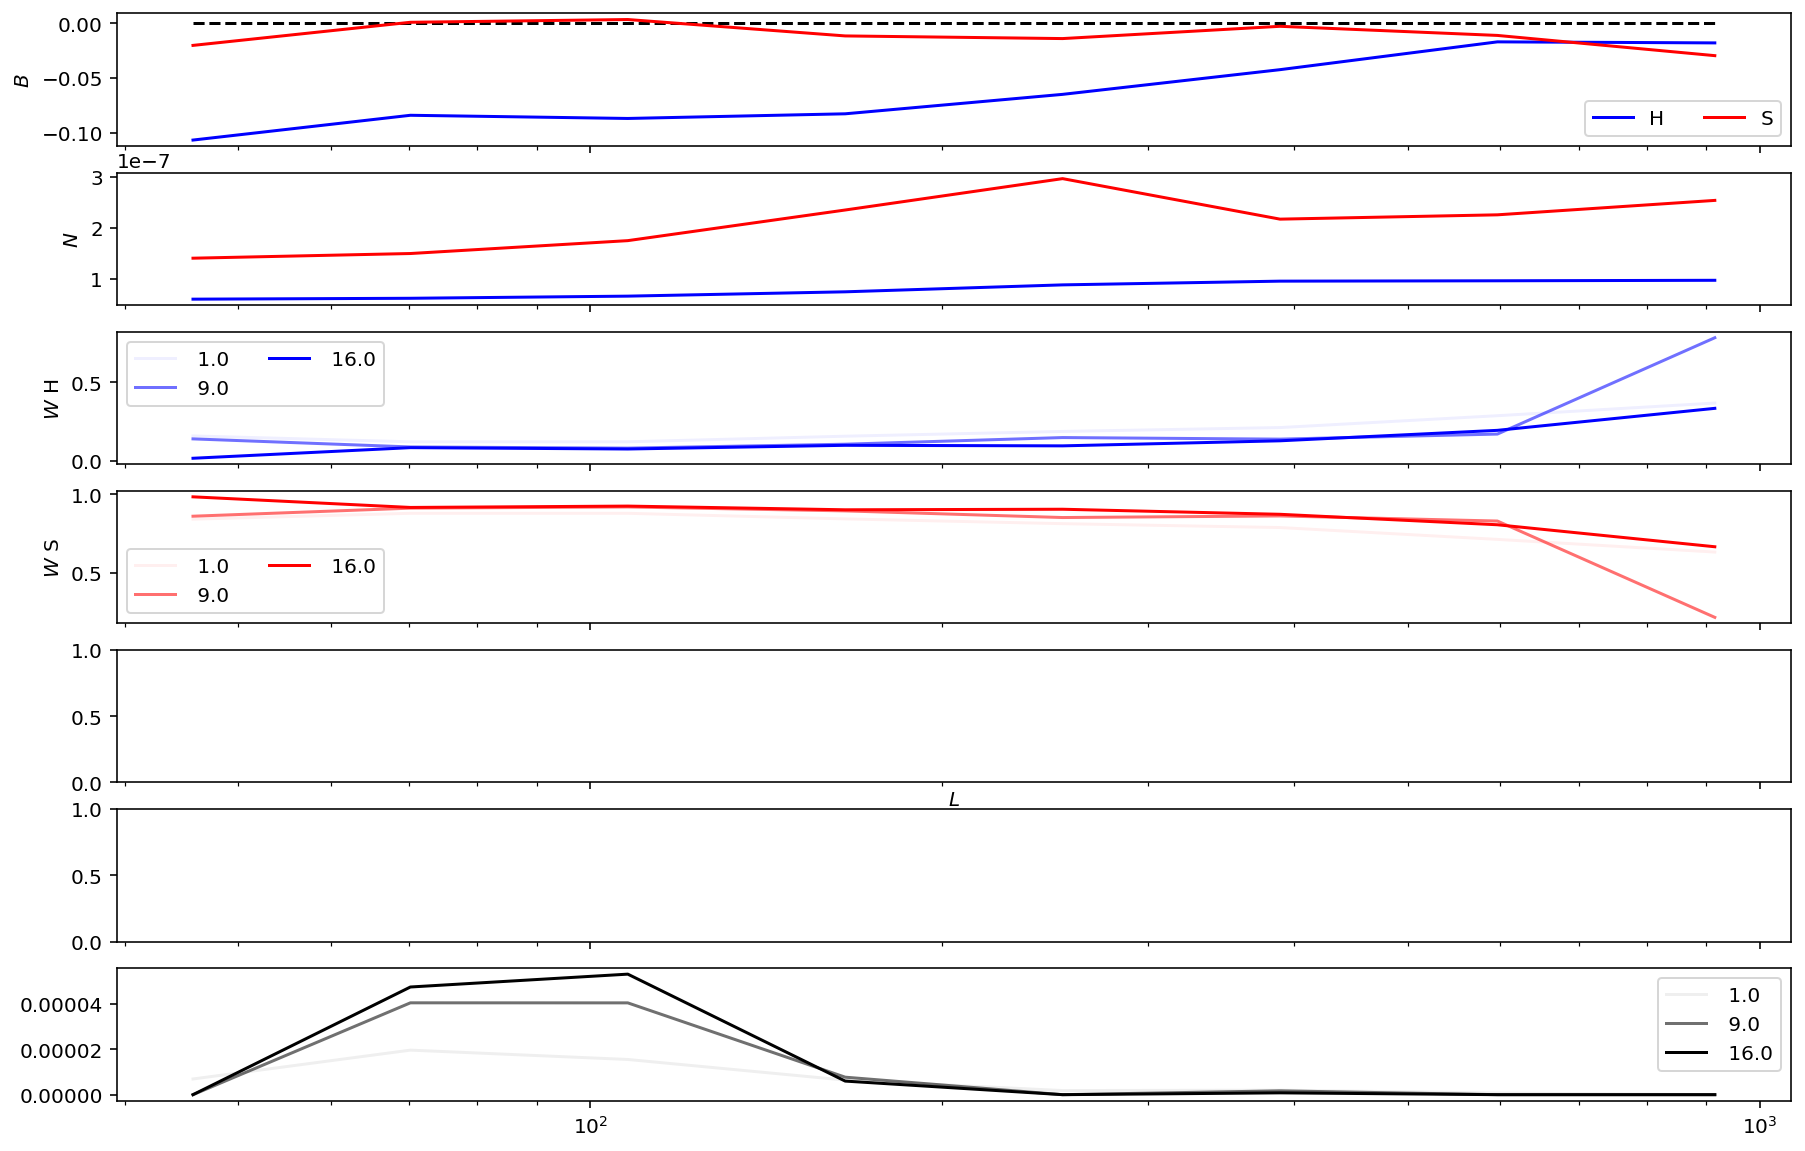

In [36]:
fbs_ = fbs

colors = ['blue', 'red', 'green', 'purple']
labels = ['H', 'S']#, 'B', 'P']

fig, ax = plt.subplots(nrows = 7, sharex = True, figsize = (15, 10))

kk = Optimizerkk.theory_selected

ells = Optimizerkk.ells_selected

#ax[0].plot(ells, combinedb/kk, color = 'purple', label = 'Combined', marker = 'o')
#ax[1].plot(ells, combinedn, color = 'purple', label = 'Combined', marker = 'o')

ax[0].plot(ells, ells*0., color = 'black', ls = '--')

for i in range(2):
    color = colors[i]
    label = labels[i]
    ax[0].plot(ells, Optimizerkk.biases_selected[i, i]/kk, color = color, label = label)
    
    ax[1].plot(ells, Optimizerkk.noises_selected[i, i], color = color, label = label)

    for fb in fbs_:
        if fb>0.:
            ws = allris[fb]
            ax[i+2].plot(ells, ws[i], color = color, label = f' {fb}', alpha =  1.*fb/fbs.max())
        
    ax[i+2].legend(ncol = len(fbs)-1)
    ax[i+2].set_ylabel(f'$W$ {label}')
    
for fb in fbs_:
    if fb > 0.:
        w = allris[fb][-1]
        ax[-1].plot(ells, w, color = 'black', label = f' {fb}', alpha = 1.*fb/fbs.max())

ax[-1].legend()

#ax[3].plot(ells, w, color = 'black')

#ax[4].plot(ells, ws*w*ells, color = 'red', label = 'S')
#ax[4].plot(ells, wbh*w*ells, color = 'green', label = 'B')

ax[4].set_xlabel('$L$')
ax[0].set_ylabel('$B$')
ax[1].set_ylabel('$N$')



#ax[3].set_ylabel('$W_L$')
#ax[4].set_ylabel('$LWW_L$')
ax[0].set_xscale('log')
ax[0].legend(ncol = 4)

Text(0.5, 0, '$f_b$')

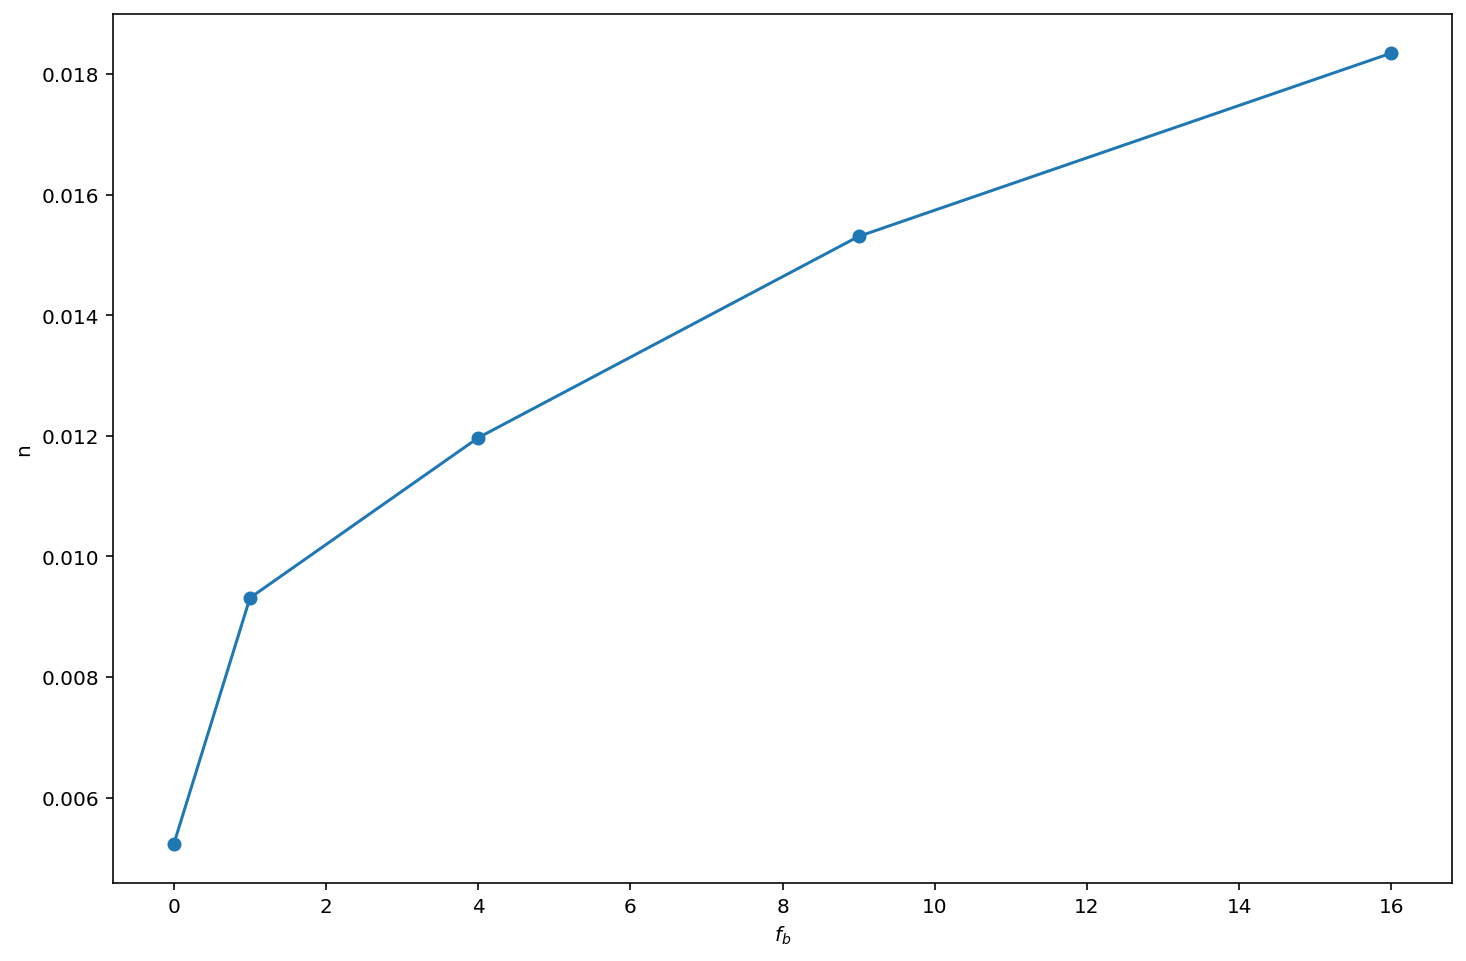

In [48]:
plt.plot(fbs, ns, marker = 'o')
plt.ylabel('n')
plt.xlabel('$f_b$')

Text(0.5, 0, '$f_b$')

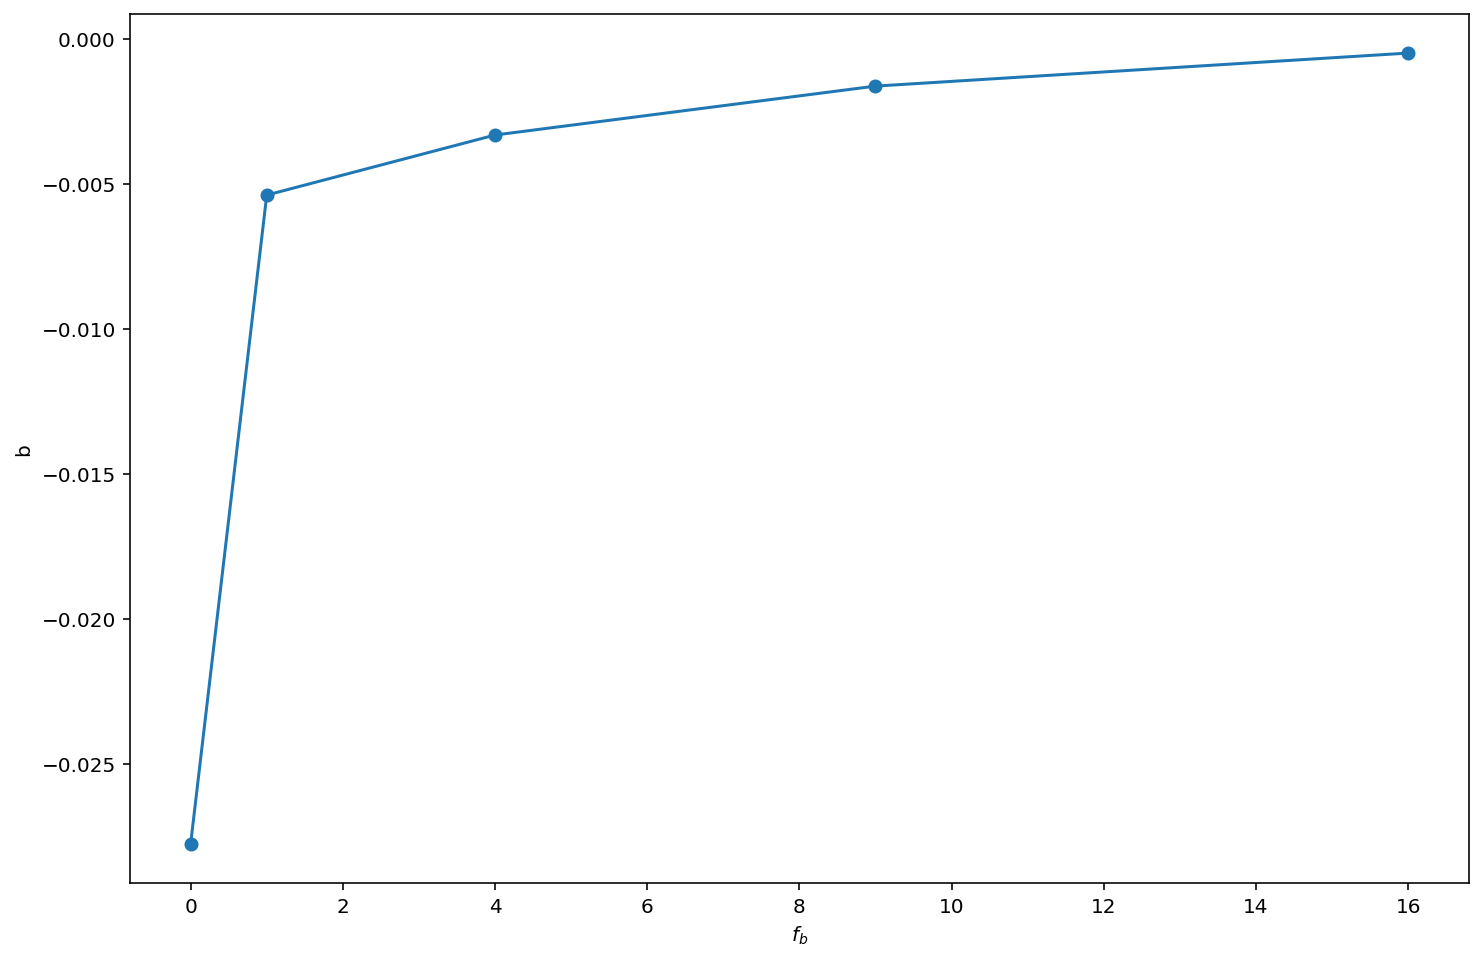

In [49]:
plt.plot(fbs, bs, marker = 'o')
plt.ylabel('b')
plt.xlabel('$f_b$')

In [51]:
ns**2/bs**2-fbs**2

array([ 3.55429212e-02,  1.98039010e+00, -3.02045172e+00,  6.61391137e+00,
        1.11139321e+03])

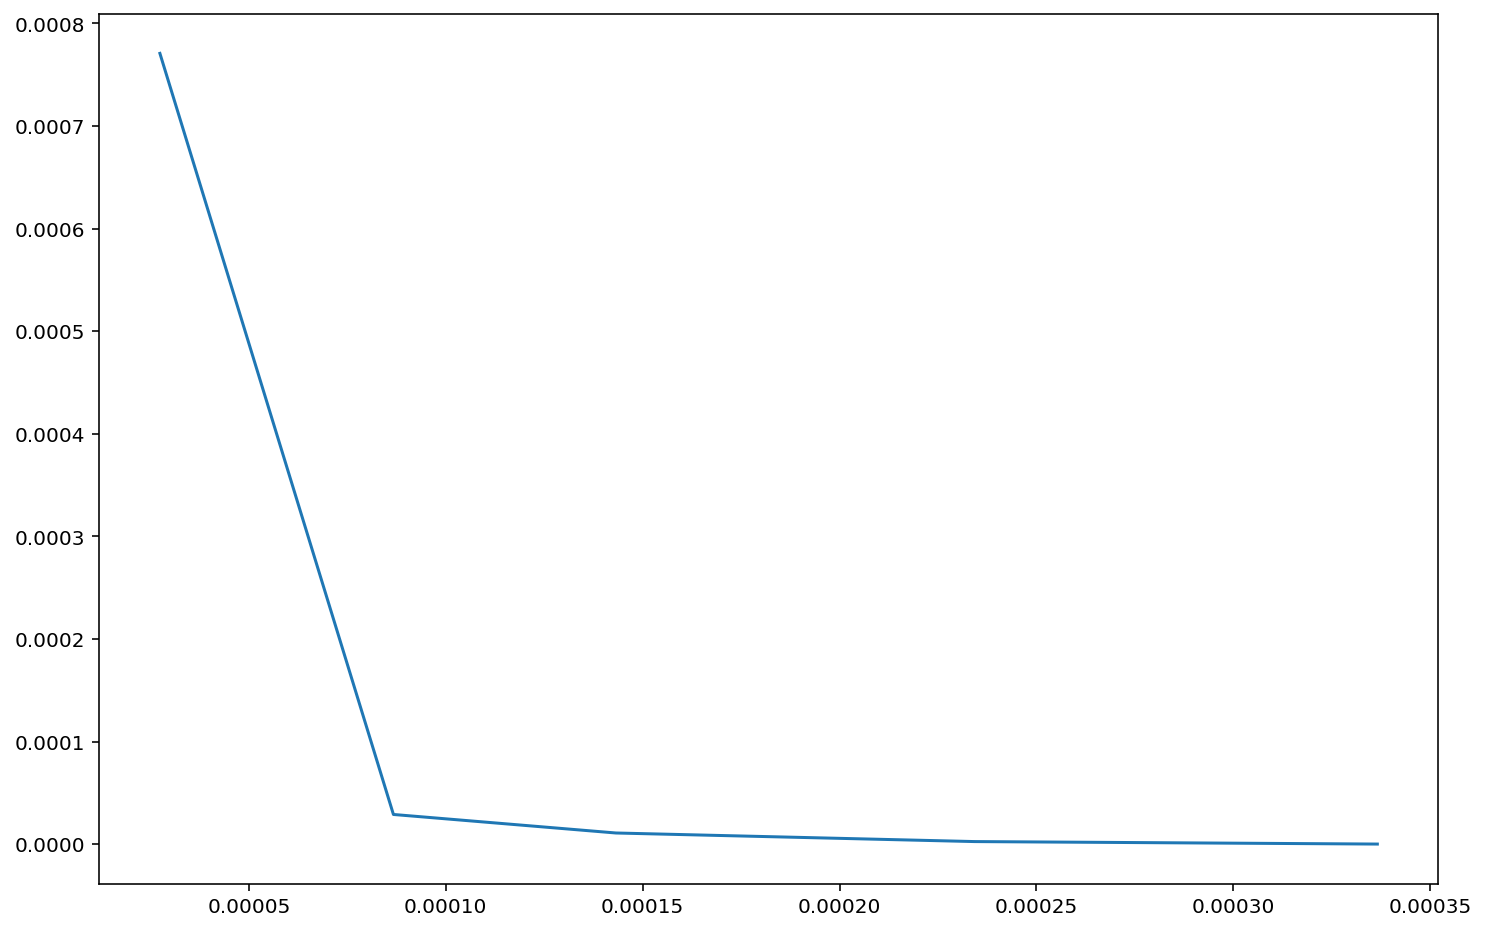

In [52]:
plt.plot(ns**2, bs**2)

In [ ]:
#L=n^2+b^2*fb = b^2(n^2/b^2+fb) -> L/b^2 = n^2/b^2+fb = x^2+fb
# L/b^2-fb = x^2

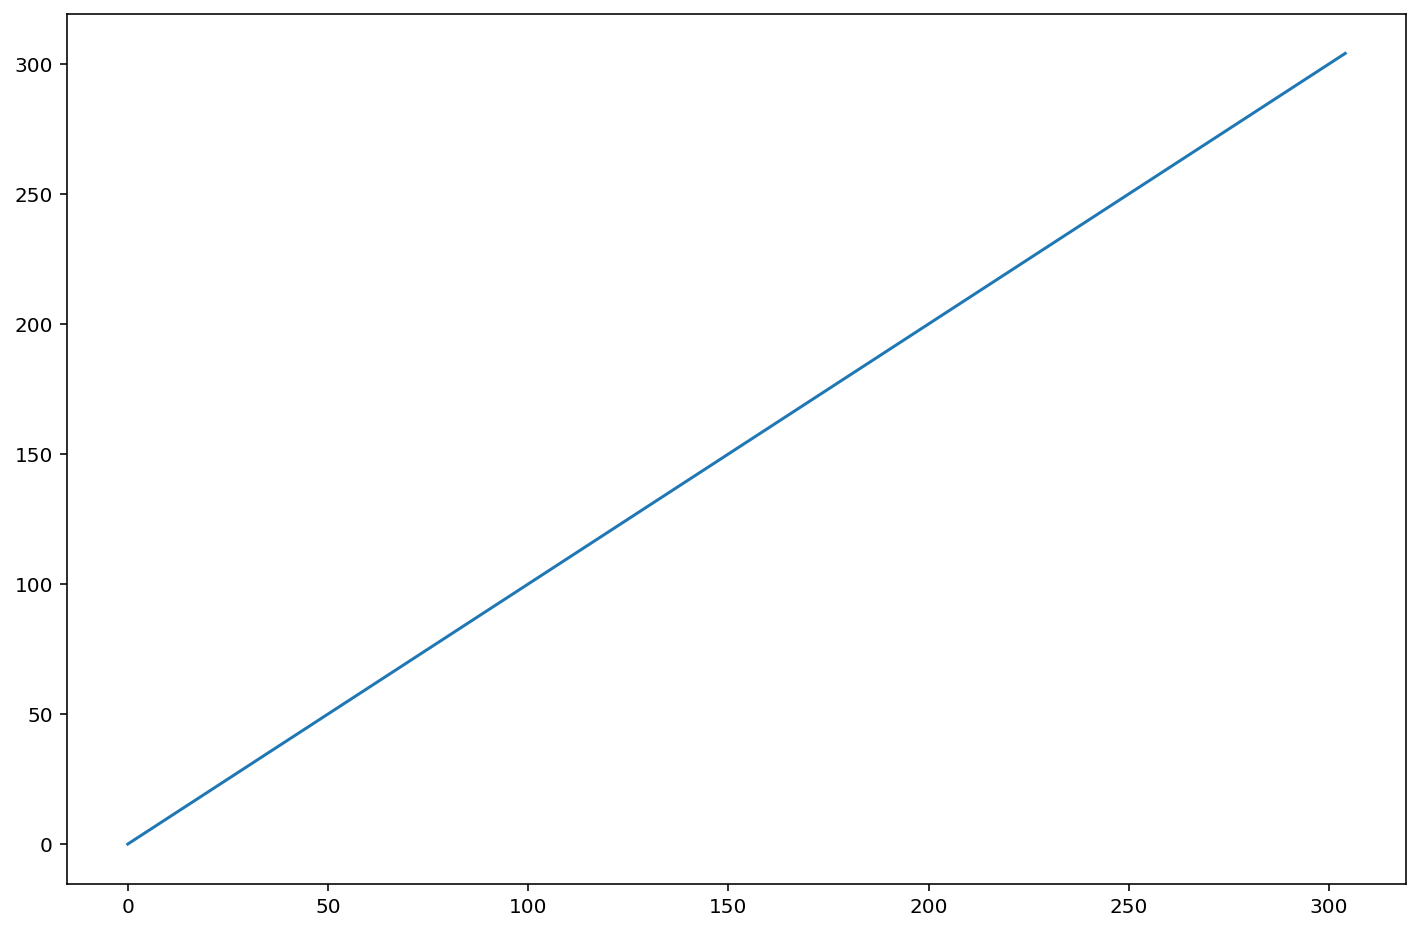

In [148]:
plt.plot(ns**2/bs**2, fs/bs**2-fbs)

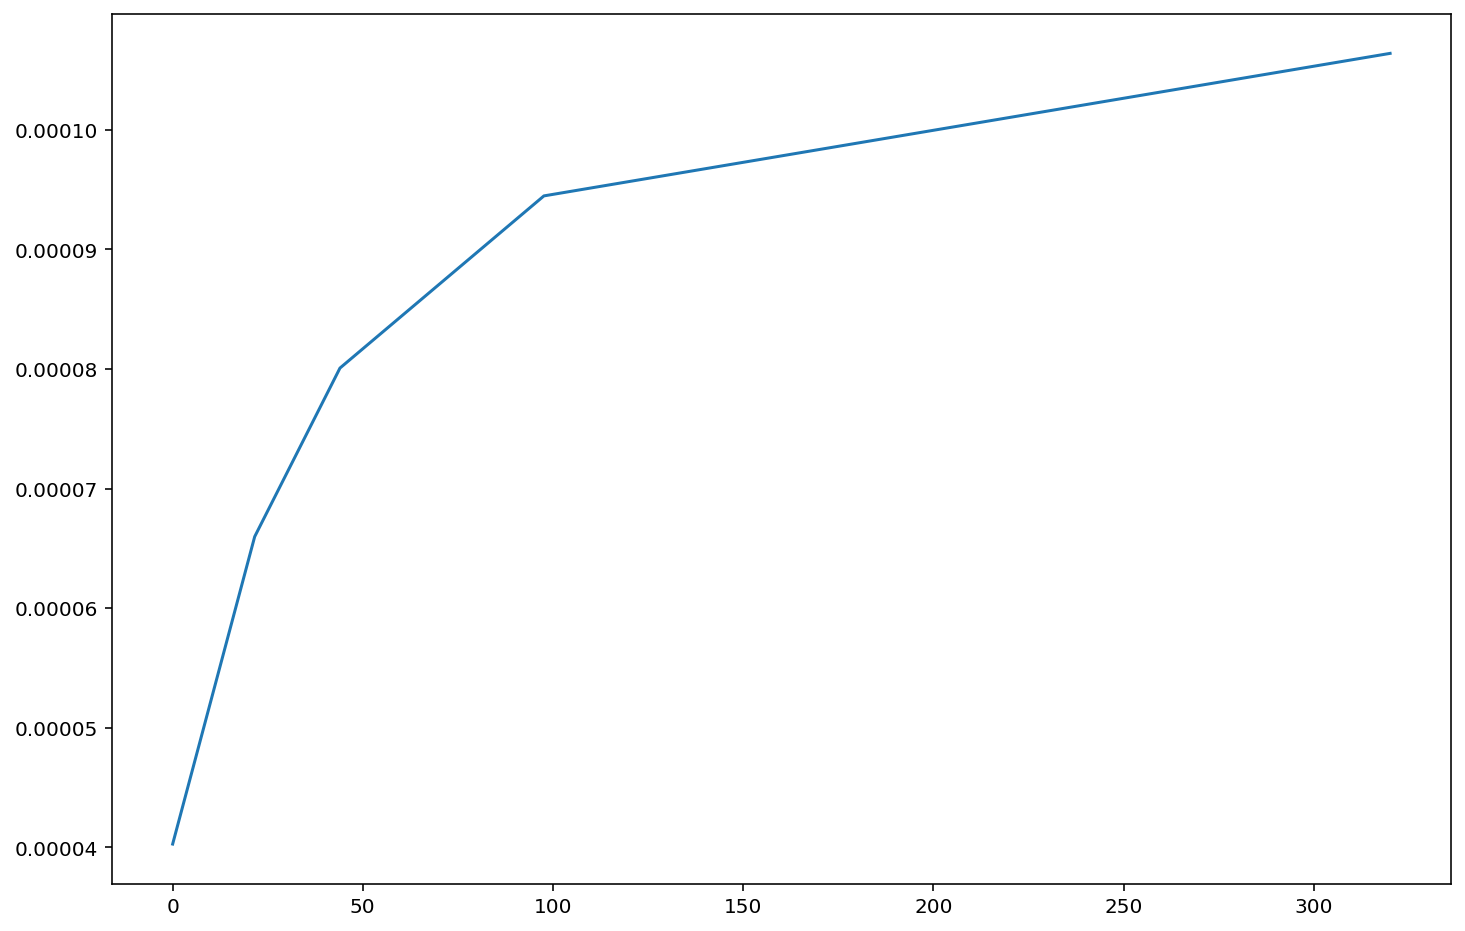

In [147]:
plt.plot(ns**2/bs**2+fbs, fs)

Text(0.5, 0, '$b$')

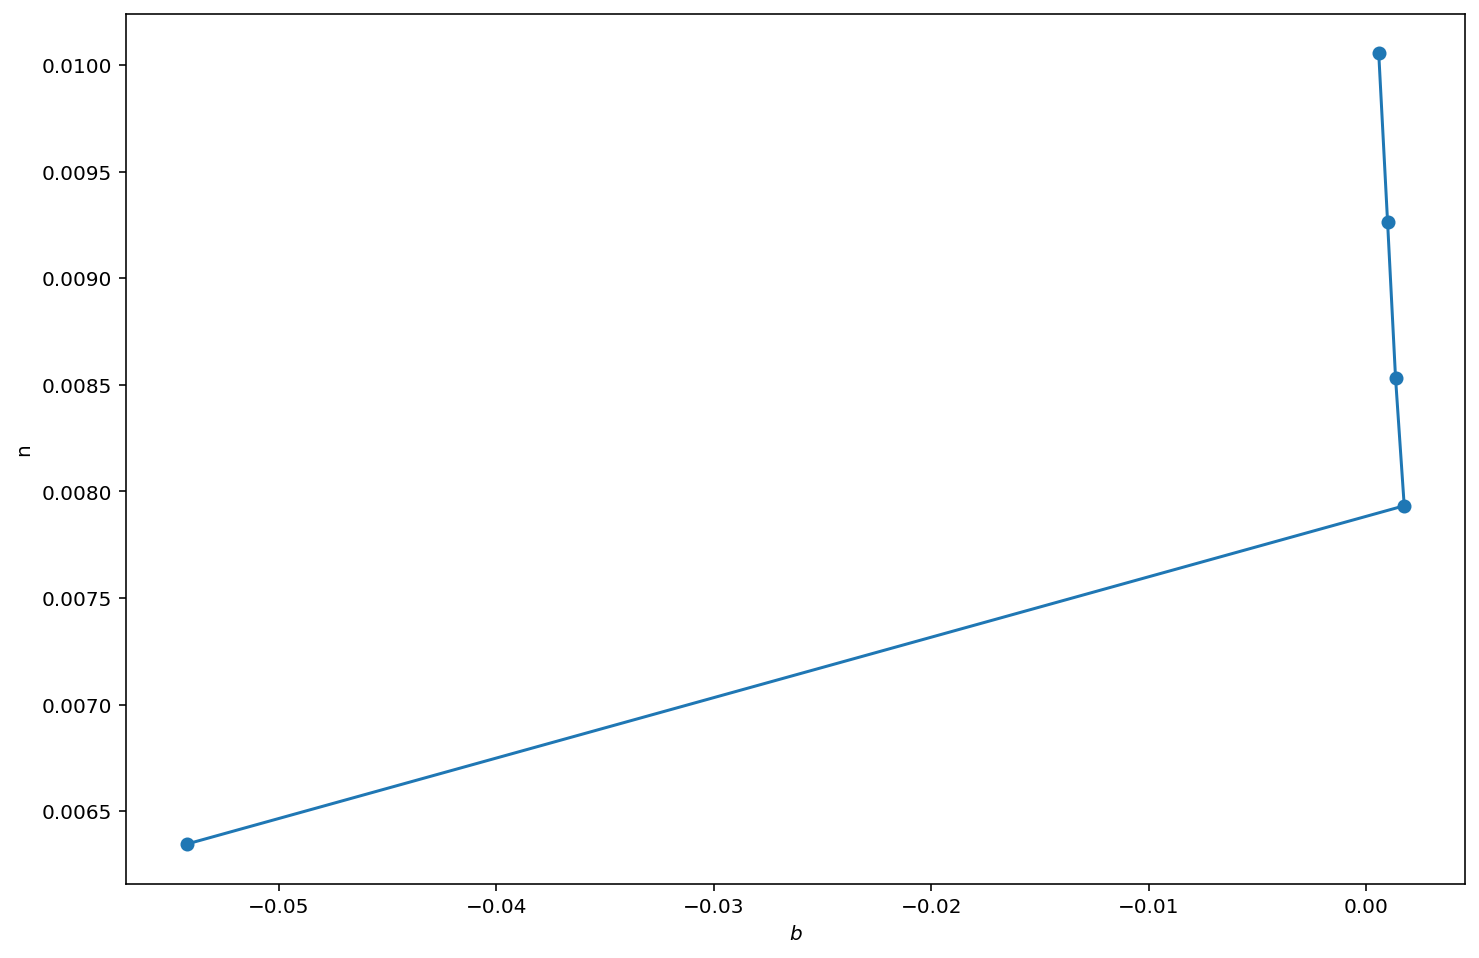

In [137]:
plt.plot(bs, ns, marker = 'o')
plt.ylabel('n')
plt.xlabel('$b$')

In [37]:
best_config = lmaxes_configs[list(fs).index(min(list(fs)))]

In [38]:
for lmaxes in [best_config]:

    s, b = lmaxes
    lmax_directory = get_dir(s, b)
    print('Doing for', lmax_directory)

    P = PP/lmax_directory

    getoutname = lambda key: f'{key}_{nu}.npy'
    noises = np.load(P/getoutname(noisetag))

    getoutname2 = lambda key: f'{key}_total_{nu}.npy'

    if bias_source == 'total':
        biases = np.load(P/'total'/getoutname2(totalbiaskey)) #getoutname('sum_all_totalbias'))
        biasescross = np.load(P/'total'/getoutname2(primarycrosstag)) #/getoutname('sum_all_crosstotalbias'))
    elif bias_source == 'sum_bias':
        biases = np.load(P/getoutname(totalbiaskey))
        biasescross = np.load(P/getoutname(sum_all_crosstotalbias))
    elif bias_source == 'sum_abs_bias':
        biases = np.load(P/getoutname(sumalltotalabsbiaskey))
        biasescross = np.load(P/getoutname(sumallcrosstotalabsbiaskey))

    kg = np.load(P/getoutname(kgkey))
    kk = np.load(P/getoutname(kkkey))
    gg = np.load(P/getoutname(ggkey))
    ells = np.load(P/getoutname(ellskey))
    theta = np.load(P/getoutname(thetakey))
    thetacross = np.load(P/getoutname(thetacrosskey))

    estimators_to_ignore = 'hu_ok'
    Optimizerkk = best.Opt(estimators, lmin_sel, lmax_sel, ells, kk, theta, biases, noises, estimators_to_ignore)
    result = Optimizerkk.optimize(optversion, method = 'diff-ev', gtol = gtol, bounds = [0., 1.], noisebiasconstr = noisebiasconstr, fb = fb, inv_variance = invvariance)

    #result.save_all(pathlib.Path('twocases')/lmax_directory, f'auto_fb_{fb}')
    #result.save(Optimizerkk.biases_selected, pathlib.Path('twocases')/lmax_directory, f'biases') 
    
    fnb_getter = lambda Opt, fb_val: Opt.get_f_n_b(Opt.ells_selected, Opt.theory_selected, Opt.theta_selected, Opt.biases_selected,
                              sum_biases_squared = False, bias_squared = False, fb = fb_val, inv_variance = False)
    
    f, n, b = fnb_getter(Optimizerkk, fb)

Doing for h3500s3500b3000
Start optimization with diff-ev
Doing for absbias
Generation 0 has ChiSquare: 0.000846
Generation 100 has ChiSquare: 0.000317
Generation 200 has ChiSquare: 0.000180
Generation 300 has ChiSquare: 0.000162
Generation 400 has ChiSquare: 0.000152
Generation 500 has ChiSquare: 0.000137
Generation 600 has ChiSquare: 0.000133
Generation 700 has ChiSquare: 0.000131
Generation 800 has ChiSquare: 0.000130
Generation 900 has ChiSquare: 0.000129
Generation 1000 has ChiSquare: 0.000129
Generation 1100 has ChiSquare: 0.000129
Generation 1200 has ChiSquare: 0.000129
Generation 1300 has ChiSquare: 0.000129
Generation 1400 has ChiSquare: 0.000129
Generation 1500 has ChiSquare: 0.000129
Generation 1600 has ChiSquare: 0.000129
Generation 1700 has ChiSquare: 0.000129
Generation 1800 has ChiSquare: 0.000129
Generation 1900 has ChiSquare: 0.000129
Generation 2000 has ChiSquare: 0.000129
Generation 2100 has ChiSquare: 0.000129
Generation 2200 has ChiSquare: 0.000129
Generation 2300 

In [39]:
n(result.x)
b(result.x)
f(result.x)

0.00012773079427518517

In [40]:
min(fs)

0.00012343079133963526

In [42]:
b = Optimizerkk.biases_selected
n = Optimizerkk.noises_selected

In [47]:
result.ws

(array([1.33381785e-08, 6.50840305e-01, 1.19635118e-08, 4.82100468e-10,
        2.92494006e-11, 1.76627395e-09, 9.99999999e-01, 2.56486642e-01]),
 array([9.99999987e-01, 3.49159695e-01, 9.99999988e-01, 1.00000000e+00,
        1.00000000e+00, 9.99999998e-01, 1.14745358e-09, 7.43513358e-01]),
 array([7.68557245e-06, 2.10010856e-05, 2.24713837e-05, 8.44628560e-06,
        3.82915584e-06, 1.41152438e-06, 1.96797405e-07, 1.70654035e-16]))

In [48]:
ws, wbh, w = result.ws

In [49]:
a = np.c_[ws, wbh]
    
combinedn = Optimizerkk.get_bias_part(a, Optimizerkk.noises_selected)
combinedb = Optimizerkk.get_bias_part(a, Optimizerkk.biases_selected)

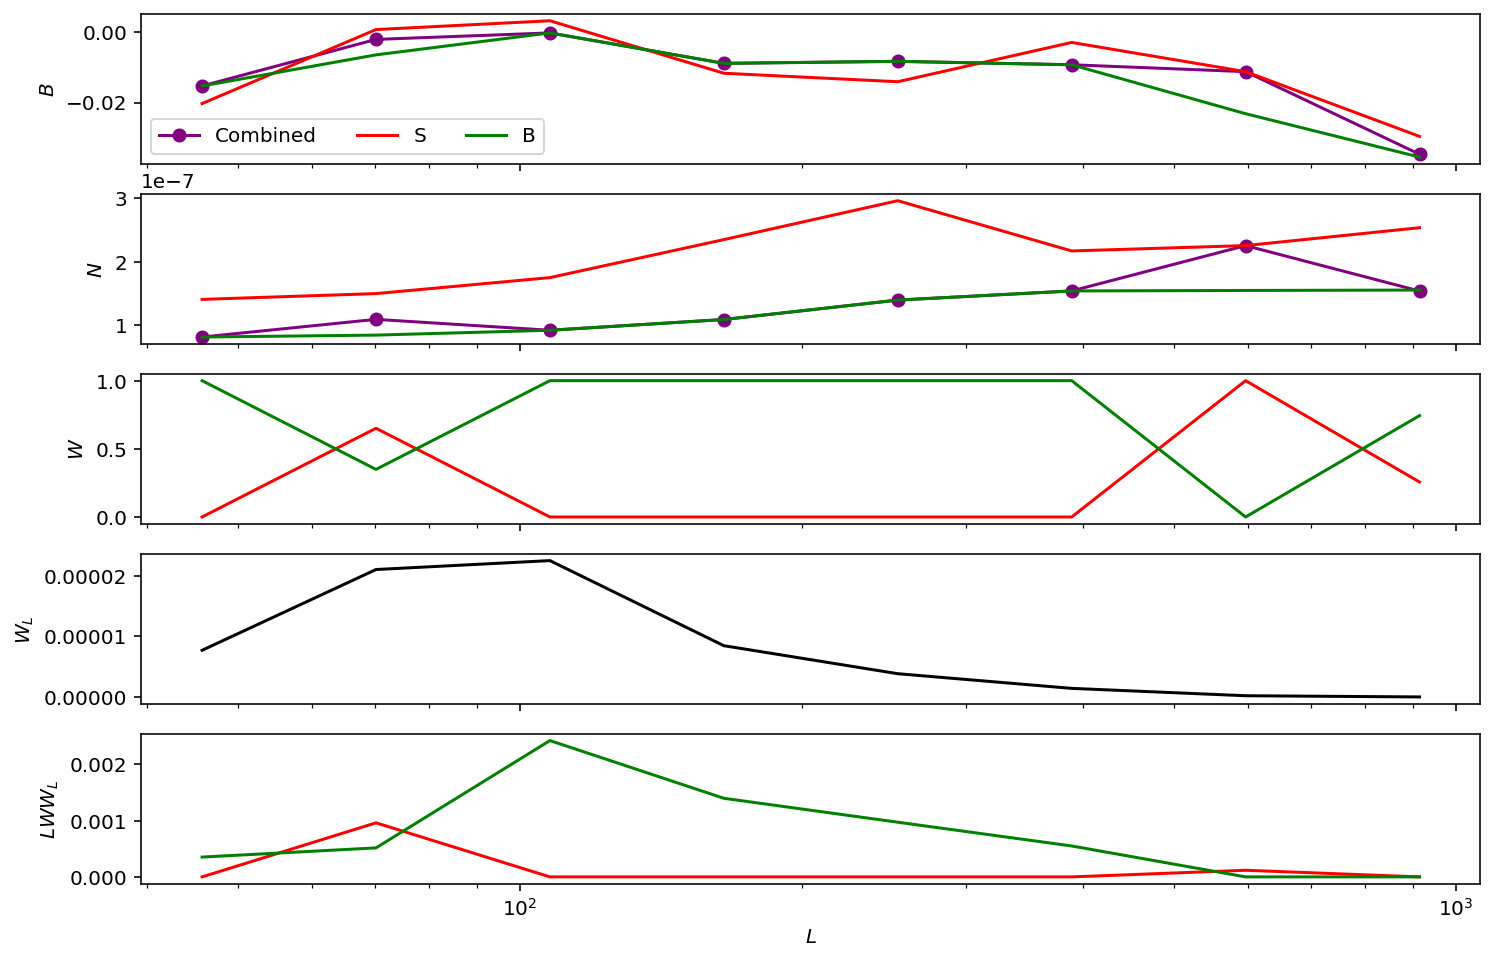

In [56]:
fig, ax = plt.subplots(nrows = 5, sharex = True)

kk = Optimizerkk.theory_selected

ells = Optimizerkk.ells_selected

ax[0].plot(ells, combinedb/kk, color = 'purple', label = 'Combined', marker = 'o')
ax[0].plot(ells, b[0, 0]/kk, color = 'red', label = 'S')
ax[0].plot(ells, b[1, 1]/kk, color = 'green', label = 'B')

ax[1].plot(ells, combinedn, color = 'purple', label = 'Combined', marker = 'o')
ax[1].plot(ells, n[0, 0], color = 'red', label = 'S')
ax[1].plot(ells, n[1, 1], color = 'green', label = 'B')


ax[2].plot(ells, ws, color = 'red', label = 'S')
ax[2].plot(ells, wbh, color = 'green', label = 'B')

ax[3].plot(ells, w, color = 'black')

ax[4].plot(ells, ws*w*ells, color = 'red', label = 'S')
ax[4].plot(ells, wbh*w*ells, color = 'green', label = 'B')

ax[4].set_xlabel('$L$')
ax[0].set_ylabel('$B$')
ax[1].set_ylabel('$N$')
ax[2].set_ylabel('$W$')
ax[3].set_ylabel('$W_L$')
ax[4].set_ylabel('$LWW_L$')
ax[0].set_xscale('log')
ax[0].legend(ncol = 4)

In [170]:
for lmaxes in [lmaxes_configs[0]]:

    s, b = lmaxes
    lmax_directory = get_dir(s, b)
    print('Doing for', lmax_directory)

    P = PP/lmax_directory

    getoutname = lambda key: f'{key}_{nu}.npy'
    noises = np.load(P/getoutname(noisetag))

    getoutname2 = lambda key: f'{key}_total_{nu}.npy'

    if bias_source == 'total':
        biases = np.load(P/'total'/getoutname2(totalbiaskey)) #getoutname('sum_all_totalbias'))
        biasescross = np.load(P/'total'/getoutname2(primarycrosstag)) #/getoutname('sum_all_crosstotalbias'))
    elif bias_source == 'sum_bias':
        biases = np.load(P/getoutname(totalbiaskey))
        biasescross = np.load(P/getoutname(sum_all_crosstotalbias))
    elif bias_source == 'sum_abs_bias':
        biases = np.load(P/getoutname(sumalltotalabsbiaskey))
        biasescross = np.load(P/getoutname(sumallcrosstotalabsbiaskey))

    kg = np.load(P/getoutname(kgkey))
    kk = np.load(P/getoutname(kkkey))
    gg = np.load(P/getoutname(ggkey))
    ells = np.load(P/getoutname(ellskey))
    theta = np.load(P/getoutname(thetakey))
    thetacross = np.load(P/getoutname(thetacrosskey))

    estimators_to_ignore = 'hu_ok'
    Optimizerkk = best.Opt(estimators, lmin_sel, lmax_sel, ells, kk, theta, biases, noises, estimators_to_ignore)
    result = Optimizerkk.optimize(optversion, method = 'diff-ev', gtol = gtol, bounds = [0., 1.], noisebiasconstr = noisebiasconstr, fb = fb, inv_variance = invvariance)

    #result.save_all(pathlib.Path('twocases')/lmax_directory, f'auto_fb_{fb}')
    #result.save(Optimizerkk.biases_selected, pathlib.Path('twocases')/lmax_directory, f'biases') 
    
    fnb_getter = lambda Opt, fb_val: Opt.get_f_n_b(Opt.ells_selected, Opt.theory_selected, Opt.theta_selected, Opt.biases_selected,
                              sum_biases_squared = False, bias_squared = False, fb = fb_val, inv_variance = False)
    
    f, n, b = fnb_getter(Optimizerkk, fb)
    ns = np.append(ns, n(result.x))
    bs = np.append(bs, b(result.x))
    fs = np.append(fs, f(result.x))

Doing for h3500s3000b2500
Start optimization with diff-ev
Doing for absbias
Generation 0 has ChiSquare: 0.001034
Generation 100 has ChiSquare: 0.000445
Generation 200 has ChiSquare: 0.000277
Generation 300 has ChiSquare: 0.000197
Generation 400 has ChiSquare: 0.000163
Generation 500 has ChiSquare: 0.000159
Generation 600 has ChiSquare: 0.000154
Generation 700 has ChiSquare: 0.000153
Generation 800 has ChiSquare: 0.000153
Generation 900 has ChiSquare: 0.000153
Generation 1000 has ChiSquare: 0.000153
Generation 1100 has ChiSquare: 0.000153
Generation 1200 has ChiSquare: 0.000153
Generation 1300 has ChiSquare: 0.000153
Generation 1400 has ChiSquare: 0.000153
Generation 1500 has ChiSquare: 0.000153
Generation 1600 has ChiSquare: 0.000153
Generation 1700 has ChiSquare: 0.000153
Generation 1800 has ChiSquare: 0.000153
Generation 1900 has ChiSquare: 0.000153
Generation 2000 has ChiSquare: 0.000153
Generation 2100 has ChiSquare: 0.000153
Generation 2200 has ChiSquare: 0.000153
Generation 2300 

In [171]:
ws, wbh, w = result.ws

a = np.c_[ws, wbh]
    
combinedn = Optimizerkk.get_bias_part(a, Optimizerkk.noises_selected)
combinedb = Optimizerkk.get_bias_part(a, Optimizerkk.biases_selected)

In [202]:
combinedb_ = Optimizerkk.get_bias_part(a, abs(Optimizerkk.biases_selected))

In [203]:
combinedtheta2 = np.einsum('ijkm..., ...i, ...j, ...k, ...m -> ...', Optimizerkk.theta_selected, a, a, a, a)

In [204]:
kk = Optimizerkk.theory_selected

In [222]:
denA = Optimizerkk.integerate_discrete(kk**2/combinedtheta2, Optimizerkk.ells_selected)
denB = Optimizerkk.integerate_discrete(kk*combinedb_/combinedtheta2, Optimizerkk.ells_selected)
den = denA-fb*denB**2/(1+fb*denB)
num = 1-fb*(combinedb_/kk)*(denB/(1+fb*denB))

In [244]:
num/den

array([0.0001233 , 0.00012397, 0.00012411, 0.00012383, 0.00012341,
       0.00012368, 0.00012252, 0.00012169])

In [239]:
w_analytical_mv = kk**2/combinedtheta2/denA
w_analytical = w_analytical_mv*(num/den)*denA

In [246]:
w_analytical/w_analytical_mv

array([0.99748397, 1.00285421, 1.00405269, 1.00176457, 0.99838476,
       1.00051497, 0.991195  , 0.98448693])

In [241]:
Optimizerkk.integerate_discrete(w_analytical, Optimizerkk.ells_selected)

1.0

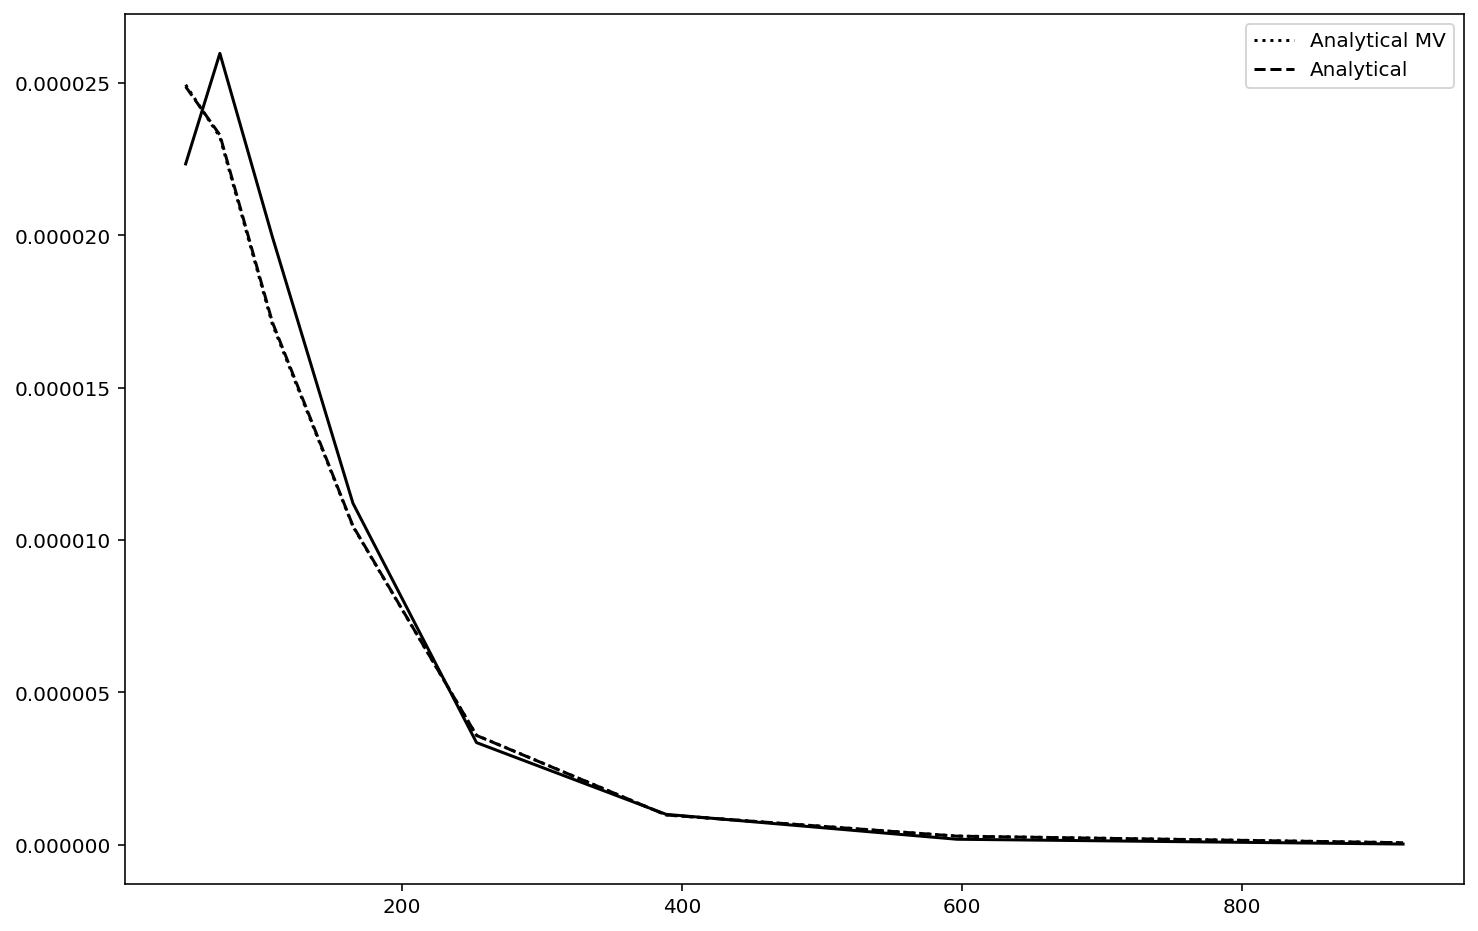

In [245]:
plt.plot(Optimizerkk.ells_selected, w_analytical_mv, color = 'black', ls = ':', label = 'Analytical MV')
plt.plot(Optimizerkk.ells_selected, w_analytical, color = 'black', ls = '--', label = 'Analytical')
plt.plot(Optimizerkk.ells_selected, w, color = 'black')
plt.legend()

In [24]:
b = Optimizerkk.biases_selected
n = Optimizerkk.noises_selected

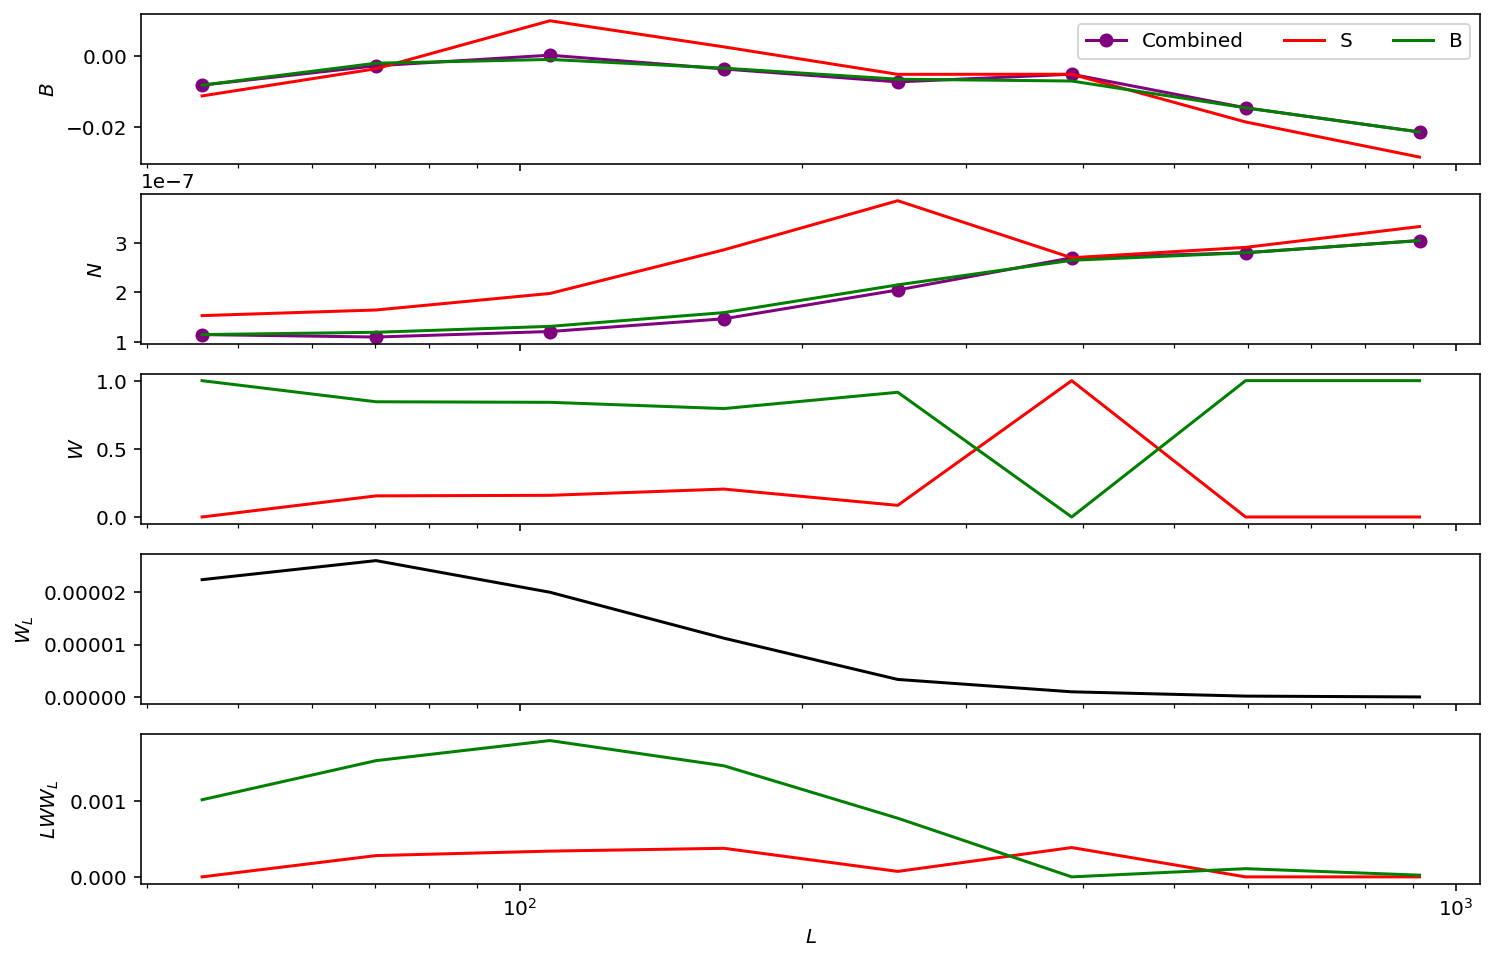

In [25]:
fig, ax = plt.subplots(nrows = 5, sharex = True)

kk = Optimizerkk.theory_selected

ells = Optimizerkk.ells_selected

ax[0].plot(ells, combinedb/kk, color = 'purple', label = 'Combined', marker = 'o')
ax[0].plot(ells, b[0, 0]/kk, color = 'red', label = 'S')
ax[0].plot(ells, b[1, 1]/kk, color = 'green', label = 'B')

ax[1].plot(ells, combinedn, color = 'purple', label = 'Combined', marker = 'o')
ax[1].plot(ells, n[0, 0], color = 'red', label = 'S')
ax[1].plot(ells, n[1, 1], color = 'green', label = 'B')


ax[2].plot(ells, ws, color = 'red', label = 'S')
ax[2].plot(ells, wbh, color = 'green', label = 'B')

ax[3].plot(ells, w, color = 'black')

ax[4].plot(ells, ws*w*ells, color = 'red', label = 'S')
ax[4].plot(ells, wbh*w*ells, color = 'green', label = 'B')

ax[4].set_xlabel('$L$')
ax[0].set_ylabel('$B$')
ax[1].set_ylabel('$N$')
ax[2].set_ylabel('$W$')
ax[3].set_ylabel('$W_L$')
ax[4].set_ylabel('$LWW_L$')
ax[0].set_xscale('log')
ax[0].legend(ncol = 4)

In [56]:
for lmaxes in [lmaxes_configs[0]]:

    s, b = lmaxes
    lmax_directory = get_dir(s, b)
    print('Doing for', lmax_directory)

    P = PP/lmax_directory

    getoutname = lambda key: f'{key}_{nu}.npy'
    noises = np.load(P/getoutname(noisetag))

    getoutname2 = lambda key: f'{key}_total_{nu}.npy'

    if bias_source == 'total':
        biases = np.load(P/'total'/getoutname2(totalbiaskey)) #getoutname('sum_all_totalbias'))
        biasescross = np.load(P/'total'/getoutname2(primarycrosstag)) #/getoutname('sum_all_crosstotalbias'))
    elif bias_source == 'sum_bias':
        biases = np.load(P/getoutname(totalbiaskey))
        biasescross = np.load(P/getoutname(sum_all_crosstotalbias))
    elif bias_source == 'sum_abs_bias':
        biases = np.load(P/getoutname(sumalltotalabsbiaskey))
        biasescross = np.load(P/getoutname(sumallcrosstotalabsbiaskey))

    kg = np.load(P/getoutname(kgkey))
    kk = np.load(P/getoutname(kkkey))
    gg = np.load(P/getoutname(ggkey))
    ells = np.load(P/getoutname(ellskey))
    theta = np.load(P/getoutname(thetakey))
    thetacross = np.load(P/getoutname(thetacrosskey))

    estimators_to_ignore = 'hu_ok'
    Optimizerkk = best.Opt(estimators, lmin_sel, lmax_sel, ells, kk, theta, biases, noises, estimators_to_ignore)
    result = Optimizerkk.optimize(optversion, method = 'diff-ev', gtol = gtol, bounds = [0., 1.], noisebiasconstr = noisebiasconstr, fb = fb, inv_variance = invvariance, 
                     noiseparameter = 0.)

    #result.save_all(pathlib.Path('twocases')/lmax_directory, f'auto_fb_{fb}')
    #result.save(Optimizerkk.biases_selected, pathlib.Path('twocases')/lmax_directory, f'biases') 
    
    fnb_getter = lambda Opt, fb_val: Opt.get_f_n_b(Opt.ells_selected, Opt.theory_selected, Opt.theta_selected, Opt.biases_selected,
                              sum_biases_squared = False, bias_squared = False, fb = fb_val, inv_variance = False)
    
    f, n, b = fnb_getter(Optimizerkk, fb)
    ns = np.append(ns, n(result.x))
    bs = np.append(bs, b(result.x))
    fs = np.append(fs, f(result.x))

Doing for h3500s3000b2500
Start optimization with diff-ev
Doing for absbias
Generation 0 has ChiSquare: 0.000364
Generation 100 has ChiSquare: 0.000000
Generation 200 has ChiSquare: 0.000000
Generation 300 has ChiSquare: 0.000000
Generation 400 has ChiSquare: 0.000000
Generation 500 has ChiSquare: 0.000000
Generation 600 has ChiSquare: 0.000000
Generation 700 has ChiSquare: 0.000000
Generation 800 has ChiSquare: 0.000000
Generation 900 has ChiSquare: 0.000000
Generation 1000 has ChiSquare: 0.000000
Generation 1100 has ChiSquare: 0.000000
Generation 1200 has ChiSquare: 0.000000
Generation 1300 has ChiSquare: 0.000000
Generation 1400 has ChiSquare: 0.000000
Generation 1500 has ChiSquare: 0.000000
Generation 1600 has ChiSquare: 0.000000
Generation 1700 has ChiSquare: 0.000000
Generation 1800 has ChiSquare: 0.000000
Generation 1900 has ChiSquare: 0.000000
Generation 2000 has ChiSquare: 0.000000
Generation 2100 has ChiSquare: 0.000000
STOP("ChangeOverGeneration with {'tolerance': 1e-11, 'ge

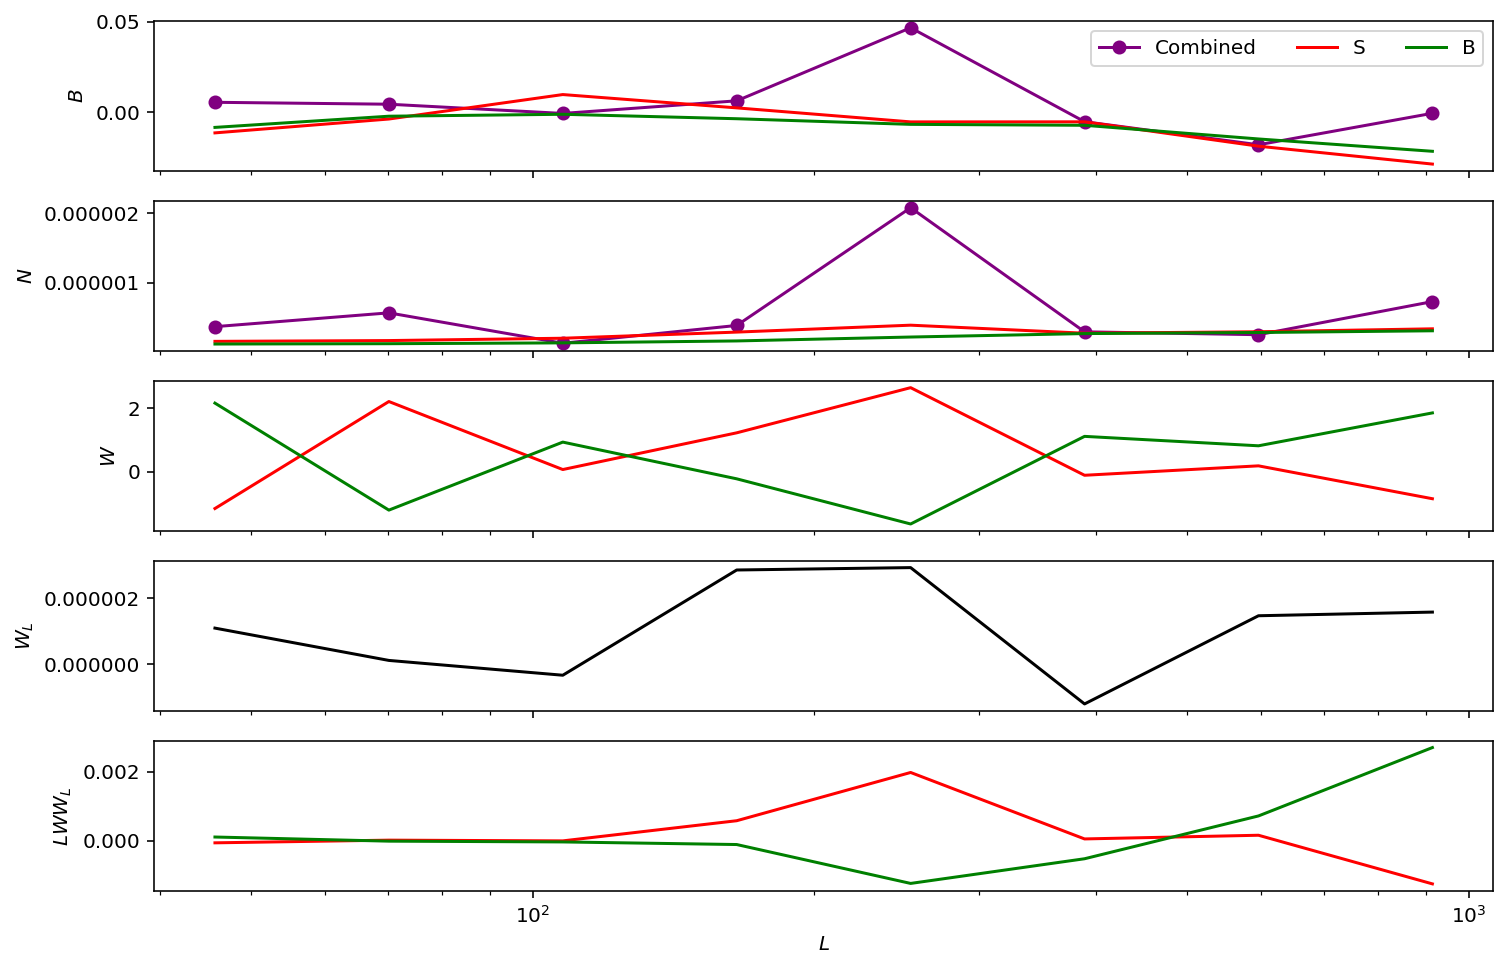

In [57]:
ws, wbh, w = result.ws

a = np.c_[ws, wbh]
    
combinedn = Optimizerkk.get_bias_part(a, Optimizerkk.noises_selected)
combinedb = Optimizerkk.get_bias_part(a, Optimizerkk.biases_selected)

b = Optimizerkk.biases_selected
n = Optimizerkk.noises_selected

fig, ax = plt.subplots(nrows = 5, sharex = True)

kk = Optimizerkk.theory_selected

ells = Optimizerkk.ells_selected

ax[0].plot(ells, combinedb/kk, color = 'purple', label = 'Combined', marker = 'o')
ax[0].plot(ells, b[0, 0]/kk, color = 'red', label = 'S')
ax[0].plot(ells, b[1, 1]/kk, color = 'green', label = 'B')

ax[1].plot(ells, combinedn, color = 'purple', label = 'Combined', marker = 'o')
ax[1].plot(ells, n[0, 0], color = 'red', label = 'S')
ax[1].plot(ells, n[1, 1], color = 'green', label = 'B')


ax[2].plot(ells, ws, color = 'red', label = 'S')
ax[2].plot(ells, wbh, color = 'green', label = 'B')

ax[3].plot(ells, w, color = 'black')

ax[4].plot(ells, ws*w*ells, color = 'red', label = 'S')
ax[4].plot(ells, wbh*w*ells, color = 'green', label = 'B')

ax[4].set_xlabel('$L$')
ax[0].set_ylabel('$B$')
ax[1].set_ylabel('$N$')
ax[2].set_ylabel('$W$')
ax[3].set_ylabel('$W_L$')
ax[4].set_ylabel('$LWW_L$')
ax[0].set_xscale('log')
ax[0].legend(ncol = 4)

In [58]:
BB = np.rollaxis(b, 2, 0)

In [59]:
e = np.ones(2)

In [60]:
invB = np.linalg.inv(BB)

In [61]:
norms = np.einsum('i, ...ij, j -> ...', e, invB, e)
a = np.einsum('i, ...ij -> ...j', e, invB)/norms.reshape(8, 1)

In [78]:
a.flatten()

array([ 0.87242743,  0.12757257,  0.70879901,  0.29120099, -0.86572348,
        1.86572348,  0.16614247,  0.83385753,  0.439462  ,  0.560538  ,
        0.44384155,  0.55615845,  0.62001279,  0.37998721,  0.87831924,
        0.12168076])

In [169]:
from mystic.penalty import linear_equality, quadratic_equality

import mystic.solvers as my

from mystic.monitors import VerboseMonitor

def constraint_eq(x):
    x = np.array(x)
    a = Optimizerkk.get_a(x, inv_variance = True)
    a[:, 1] = 1-a[:, 0]
    x = a.flatten()
    return x


def penalty1(x):
    x = np.array(x)
    b = x[-Optimizerkk.nbins:]
    res = Optimizerkk.integerate_discrete(b, Optimizerkk.ells_selected)
    return 1-res

k = 1e20

@quadratic_equality(condition=penalty1, k = k)
def penalty(x):
    return 0.0 

bounds = [0., 1.]

Ne = len(Optimizerkk.estimators)

dims = Ne+1

bnds = [(bounds[0], bounds[1]) for i in range(dims*Optimizerkk.nbins)]
bnds = tuple(bnds)

x0 = result.x


mon = VerboseMonitor(100)


def constraint_eq(x):
    x = np.array(x)
    x[1] = 1.-x[0]
    return x

for i in range(8):
    def functiontoopt(x):
        x = np.array(x)
        biasterm = np.einsum('ij..., i, j -> ...', abs(Optimizerkk.biases_selected)/Optimizerkk.theory_selected, x, x)
        return np.sqrt((biasterm[i])**2)

    x0 = np.array([0.5, 0.5])

    resultfromT = my.diffev(functiontoopt, x0, npop = 10, bounds = [(0, 1), (0, 1)], ftol = 1e-10, gtol = 1000, maxiter = 1024**3, 
                          maxfun = 1024**3, constraints = constraint_eq, full_output = False)
    print(resultfromT)

Optimization terminated successfully.
         Current function value: 0.008313
         Iterations: 1049
         Function evaluations: 10283
[1.00908251e-16 1.00000000e+00]
Optimization terminated successfully.
         Current function value: 0.002147
         Iterations: 1006
         Function evaluations: 10056
[0.00317486 0.99682514]
Optimization terminated successfully.
         Current function value: 0.001066
         Iterations: 1011
         Function evaluations: 10077
[8.87113738e-06 9.99991129e-01]
Optimization terminated successfully.
         Current function value: 0.002475
         Iterations: 1024
         Function evaluations: 10185
[9.99999946e-01 5.42444655e-08]
Optimization terminated successfully.
         Current function value: 0.005269
         Iterations: 1042
         Function evaluations: 10298
[1.00000000e+00 3.50366403e-11]
Optimization terminated successfully.
         Current function value: 0.005369
         Iterations: 1013
         Function evaluatio

In [163]:
resultfromT[0].sum()

1.0

In [164]:
functiontoopt(resultfromT[0])

0.0021301014746883946

In [165]:
resultfromT[0]

array([4.05388716e-12, 1.00000000e+00])

In [161]:
a[:, 0]

array([ 0.87242743,  0.70879901, -0.86572348,  0.16614247,  0.439462  ,
        0.44384155,  0.62001279,  0.87831924])

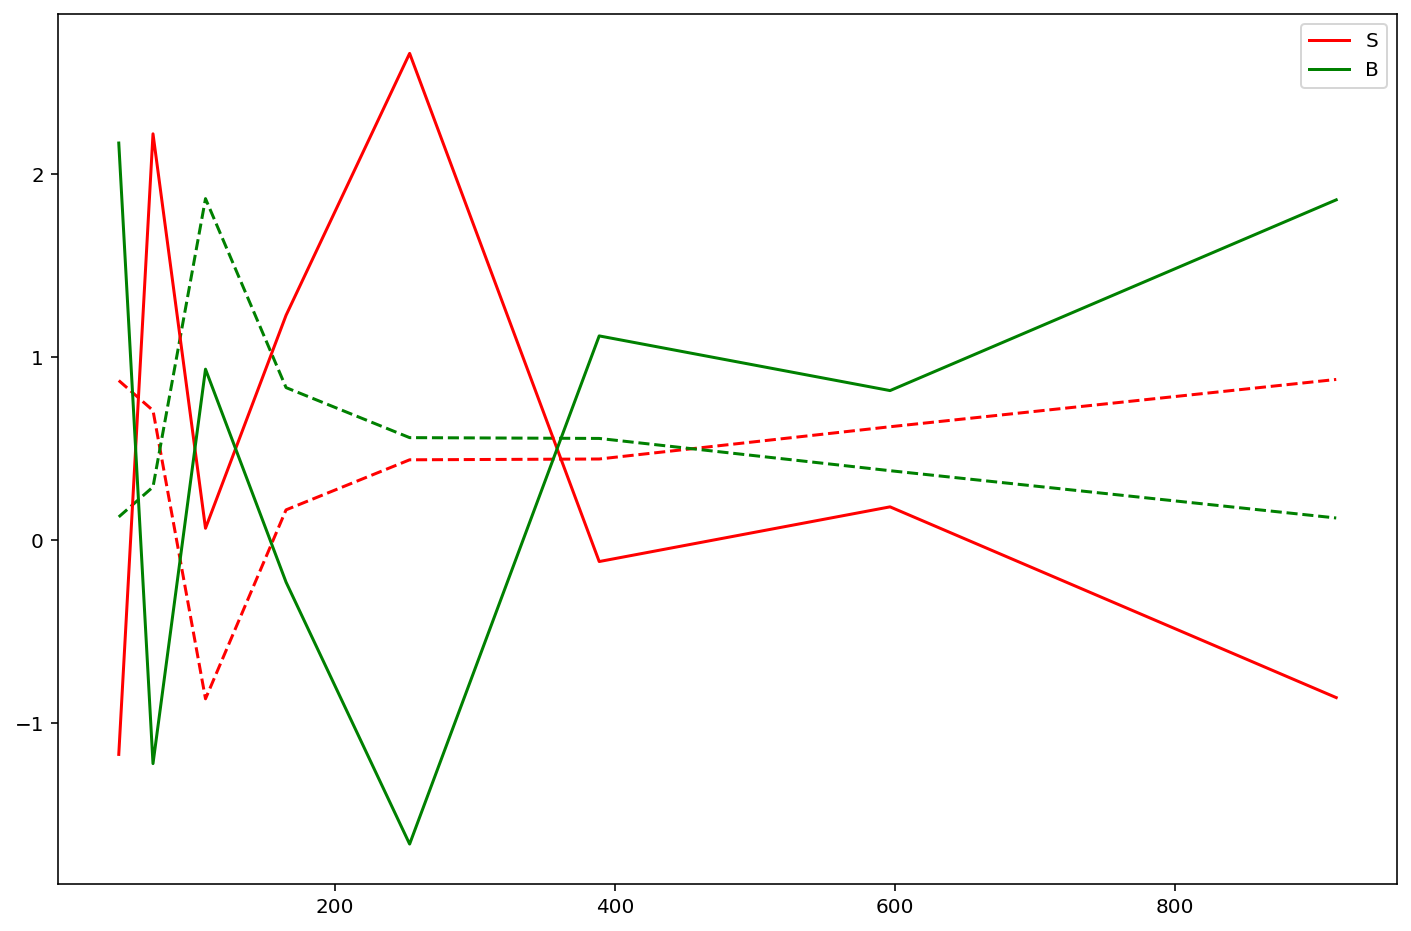

In [63]:
plt.plot(ells, a[:, 0], color = 'red', ls = '--')
plt.plot(ells, a[:, 1], color = 'green', ls = '--')

plt.plot(ells, ws, color = 'red', label = 'S')
plt.plot(ells, wbh, color = 'green', label = 'B')
plt.legend()

In [64]:
wbh

array([ 2.16933974, -1.21967137,  0.93442201, -0.22863171, -1.65896133,
        1.11610153,  0.81746514,  1.85910929])